---
title: "Clustering"
---

# Introduction
In this section, I will be using my feature data in order for the purposes of clustering. I will be completing 4 different clustering techniques: 3 for my numerical feature set (k-means, and DBSCAN, and Hierarchical clustering) and 1 for my categorical feature set (k-modes). The increased emphasis on our numerical feature set comes from the fact that our numerical features appear to be more significant than our categorical features in terms of explaining a horse's race performance and also due to the fact that previous sections, like our Classification section, have already explored a lot of the nuances of our categorical feature set. The overall intentions of this analysis will be to try and find "groups" of horses within our peformance dataset. This analysis will be helpful in visualizing some of the interactions between variables and not only what really is driving differentiations in horse racing performance, but what are these differentiations.

# Theory
Before delving into our analysis, I am going to provide an overview of the various clustering methods that will be used in this section, highlighting what the methods are, how they work, and any model selections that I will be using with each method. It should be noted that all these clustering methods are unsupervised machine learning algorithims, meaning they attempt to form and label groups from a label-less feature set.

## K-Means Clustering
*Adapted from: [Towards Data Science](https://towardsdatascience.com/three-versions-of-k-means-cf939b65f4ea)*
K-means clustering, one of the most common clustering algorithims in machine learning, attempts to assign similar data points, without labels, to a specified number of groups, k, that we as the data scientist get to define. We will delve more into this decision of what k should be in a little bit. 

K-means clustering typically implies the usage of LLoyd's algorithim, although there a variety of different algorithims that can be used to do k-means clustering (see the above link). For the purposes of this project, we will just be reviewing Lloyd's algorithims. Lloyd's works by following steps:
1. k is chosen as the number of centroids, with k datapoints being randomly selected as centroids
2. Every data point is randomly assigned to a centroid and centroids are recalculated a mean of all their assigned datapoints.
3. Each datapoint is reassigned to its closest centroid (typically by the usage of distance metric like Euclidean distance), centroids are recalculated as a mean of their assigned data points.
4. Steps 1-3 are repeated until convergence.

## Density-Based Spatial Clustering of Applications With Noise (DBSCAN)

*Adapted from: [Crunching The Data](https://crunchingthedata.com/when-to-use-dbscan/)*

The DBSCAN algorithim, which we will employing through sklearn, is different from a partioning algorithim, like a k-means clustering algorithim, in that is able to work with clusters that are not spherical (aka convex). DBSAN takes into account that data may adhere to clusters of arbitrary shapes or contain noise that impacts the shape of the cluster. DBSCAN is also robust to outliers and does not require us to specify a certain number of clusters. On top of all these advantages, DBSCAN is a computationally fast algorithim, all things considered.

You may be asking yourself, with all of these advantages to DBSCAN, why would we consider any other algorithim for clustering? For one, DBSCAN requires drops in density between cluster borders, so if you have datapoints in potential clusters that are fairly overlapping, DBSCAN is going to have a hard time delineating the clusters, probably assigning all the data points to one "mega cluster". Also, DBSCAN struggles to detect clusters with varying density and also really struggles with high-dimensional data. If you do feel as though there is not a lot of density drop in clusters or significantly irregular density fluctuations in your clusters, DBSCAN should NOT be used. Otherwise, DBSCAN can serve as a formidable technique to dealing with anomalous datapoints and/or non-convex clusters.

## Hierarchical Clustering
At the core of hierarchical clustering is the dendrogram. A dendrogram is a tree-like visualization that relates all dataspoints in our space. At the bottom of our dendrogram, we have each of our datapoints. As we move up the tree, we see the tree aggregate into clusters. The further we move up the tree, the greater our cluster size/distance is. An example image of a dendrogram can be seen below (the orginal image can be found in the above link).

![Dendrogram](../images/dendrogram.png)

Dendrograms can be derived either through **agglomerative clustering** or **divsive clustering**. In agglomerative clustering, data points are first considered as their own subclusters, and then through defining a distance metric (e.g. Euclidean distance), we measure the distance between all of our subclusters and merge the two nearest subclusters, repeating this process until we are left with one cluster, the "top" of the dendrogram.

In divisive clustering, we performing a "top down" approach to developing our dendrogram. We iteratively perform the process of k-means on our data, starting from the datset as a whole, all the way until we have k clusters equal to the amount of datapoints in the dataset, or the number of clusters you so desire in your dendrogram.

Hierarchical clustering allows us to create clusters out of very complex shapes of data and also gives us a fairly simple medium of interpretation through the dendrogram. We are able to manually pick the number of clusters that we see as significant, which can be advantageous, but also disadvantegous if our data is complex as interpreting dendrograms is heavily driven by heuristics. This heuristical process allows us serious benefits in interpreation, but does require us to be heavily knowledged about our data.

## K-Modes Clustering
I will add a write up on this later. Right now, I am just knocking out the requirements for Homework 4.

# Methods
The methodolgy for my applications of each of the aforementioned clustering algorthims to my horse racing data will be as follows:

1. Using our numerical/cateogorical feature sets derived from the PCA section under this project
2. Performing any relevant hyper-parameter tuning in attempt to achieve optimal clustering results by creating a function that finds the silhouette score for any relevant and specified clustering technique.
3. Interpreting and visualizing our results with a finally tuned parameter choice.

Each of the algorithims' hyperparameters will be tuned using a silhouette score with the parameter that presents the highest score being chosen as the optimal parameter. Silhoutte score can be defined by the following equation where a(i) represents the average distance from the ith data point to the other data points in the same cluster abd b(i) is the smallest average distance from the ith data point to data points in a different cluster, minimized over clusters. 

![score](../images/score.png)

Due to computational limits, silhouette scores are created for only 6 hyper parameters which is actually more than enough to derive formidable conclusions. A validation split of the data, which comprimises about 10% of the dataset (for a total of around 17000 observations), is used for this parameter tuning. Anything really more than this split of data or assesment of hyperparameters leads to errors with the Python kernel crashing due to the memory required for processing the data.

It should also be noted that for DBSCAN, a minimum of 1000 points is specified as a parameter, meaning that at least 1000 points are needed to create a cluster/noise cluster. This parameter is a good rule of thumb for a validation dataset of our size, so that we are not looking at clusters that are comprised of a very miniscule amount of data points, forcing the algorithim to search for more meaningful patterns among the data.

# Prepping Our Data and Creating Functions


In [1]:
# Loading in relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
# Pulling in our data
horses = pd.read_csv('../../../data/01-modified-data/horses.clean.csv')
perf = pd.read_csv('../../../data/01-modified-data/perf.clean.no.error.csv')
# Joining data
perf_clean = pd.merge(perf,horses[["horse_id","colour","sex","import_type"]],on="horse_id",how = "inner")

/tmp/ipykernel_360334/3511168221.py:3: DtypeWarning: Columns (10,18,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  perf = pd.read_csv('../../../data/01-modified-data/perf.clean.no.error.csv')


In [7]:
# Subsetting our numerical feature set
perf_numerical = perf_clean[['rating','on_date_weight','draw','average_placement','days_between']]
perf_numerical = perf_numerical.dropna()

In [8]:
# Normalizing our feature set
scaler = StandardScaler()
scaled_data = scaler.fit_transform(perf_numerical)

In [9]:
# Creating a test, train, and validation set for this process. A validation set is going to be instrumental in finding our hyper parameter
import random
N=scaled_data.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
cut2 = int((N - cut)/2 + cut)
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
validate_index = l[cut:cut2] # 10% of shuffled list
test_index = l[cut2:] # 10% of shuffled list


In [13]:
validation_set = scaled_data[validate_index]
train_set = scaled_data[train_index]
test_set = scaled_data[test_index]

In [10]:
# Hyper parameter tuning function
def maximize_silhouette(X,algo="kmeans",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param, min_samples=1000).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param,n_init=10).fit(X)
            labels=model.predict(X)
        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

# K-Means Clustering
We will now be completing k-means clustering on our numerical feature set.

OPTIMAL PARAMETER = 3


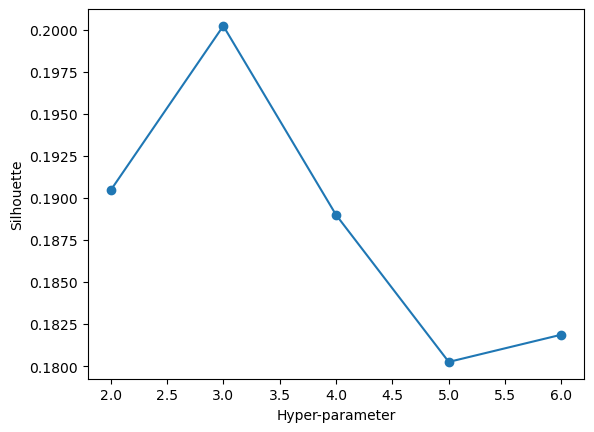

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [9]:
maximize_silhouette(validation_set,algo="kmeans",nmax=6,i_plot=True)

We can see that with our feature set, our maximal silhoeutte score occurs when we choose k=3 as our number of clusters in the data. Our score is about 0.2 at its maximal point, which is a fairly low silhouette score. We can now fit an optimal k means clustering model. We will look at our "most important" features found through PCA, horse rating and days of rest between races.

/home/mcarswell/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


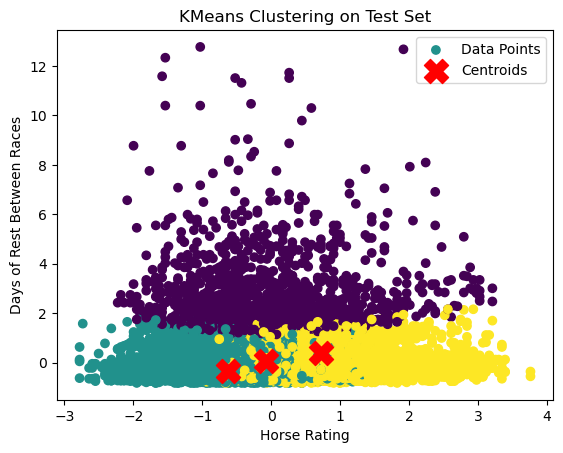

In [19]:
kmeans_model = KMeans(n_clusters=3, random_state=100)
kmeans_model.fit(test_set)

# Make predictions on the test set
predicted_clusters = kmeans_model.predict(test_set)

# Visualize the clusters and centroids
plt.scatter(test_set[:, 0], test_set[:, 4], c=predicted_clusters, cmap='viridis', label='Data Points')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering on Test Set')
plt.xlabel('Horse Rating')
plt.ylabel('Days of Rest Between Races')
plt.legend()
plt.show()

*Note: I will add more plots breaking down the various features by cluster later on. Keeping it on the simpler side for the homework.*

In this plot we can notice that there are indeed 3 distinct clusters, with days of rest between races really driving the split of data, along with horse rating driving the split between the data points with low days of rest. There is, however, significant overlap in our clusters which definitely detracts from this application of k-means clustering. This phenomena was to be expected, though, with a silhouette score of around 0.2.

# DBSCAN
Now we will pursue DBSCAN as a method of clustering, first tuning one our model's parameters, eps. Eps (epsilon) defines the maximum distance between two data points for one to be identified as a neighbor of the other.

OPTIMAL PARAMETER = 2.5


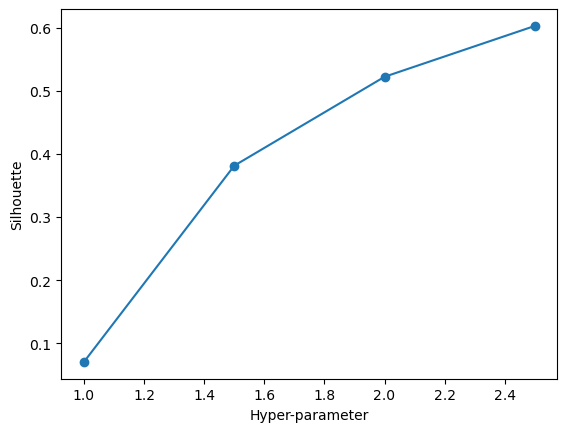

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
maximize_silhouette(validation_set,algo="dbscan",nmax=6,i_plot=True)

We can see here that 2.5 is an optimal choice of eps. We have a very high silhouette score of right under 0.8, way stronger than the score given by our k-means algorithim. This phenomena is a very reassuring observation, giving us a clustering method that is going to maximize the distance from other datapoints in other clusters and minimize in-cluster distance. We will fit our model below.

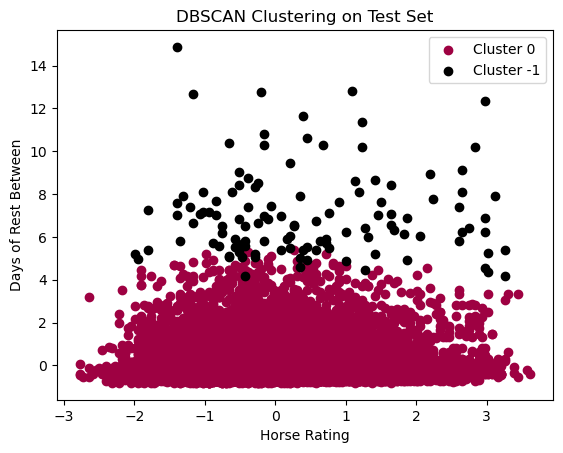

In [12]:
model = sklearn.cluster.DBSCAN(eps=2.5, min_samples= 1000).fit(test_set)

# Fit the model and get cluster labels
predicted_clusters = model.fit_predict(test_set)

# Visualize the clusters
unique_labels = set(predicted_clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:  # Points classified as noise
        col = [0, 0, 0, 1]  # Black for noise points
    else:
        col = color

    cluster_points = test_set[predicted_clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 4], c=[col], label=f'Cluster {label}')

plt.title('DBSCAN Clustering on Test Set')
plt.xlabel('Horse Rating')
plt.ylabel('Days of Rest Between')
plt.legend()
plt.show()

*Note: Once again, I will create more plots breaking down our clusters by all the different features later on.*

In the above plot, we can see that we pretty much have 1 cluster, with noise created by Days of Rest Between Races. I do think their is validity in our DBSCAN clustering, especially given the silhouette score, BUT such a high score could likely be due to the fact that it is only grouping 1 main cluster with some points labeled as noise. This clustering is not neccessairly helpful. I had to specify 1000 minimum samples as one of the parameters, otherwise the default, 2 minimum samples, has just 1 giant mega cluster with 2 points labeled as noise. These observations do show us that there is not neccessarily a lot of changes in density within the data points. This tells us that there are not neccesarily strong indicators that differentiate certain horse performances over others, at least in terms of density of data points. This observation IS a noted disadvantage of DBSCAN in that DBSCAN struggles when there is overlap of our clusters. K-mean clustering did highlight that there are signifcant overlaps of our datapoints, so this is a caveat that must be taken into account of DBSCAN model.

# Hierarchical Clustering
In this section, we will be performing agglomerative clustering. We will first start by looking at a dendrogram.


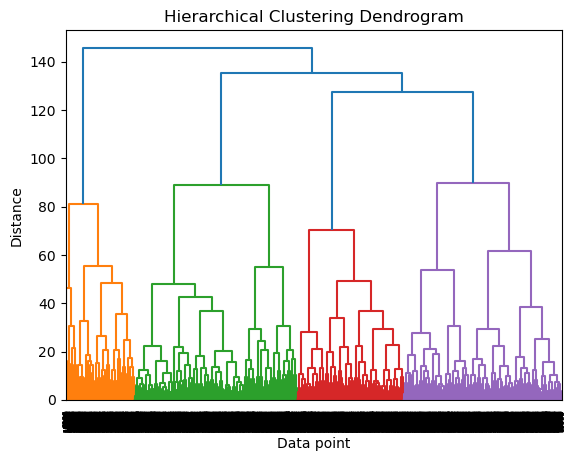

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
Z = linkage(validation_set, 'ward')
dendrogram(Z)
 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

Our dendrogram appears to show that most of the distance between clusters is defined over 3 clusters, which is similar to the findings from our k-means clustering. We will confirm this by looking at silhouette score for our hyper parameter.

OPTIMAL PARAMETER = 3


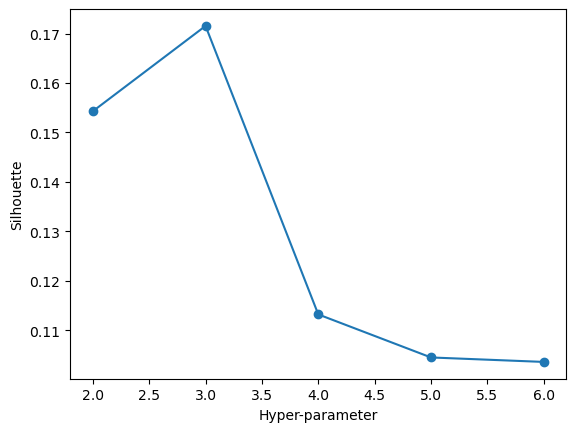

array([0, 2, 0, ..., 2, 1, 0])

In [15]:
maximize_silhouette(validation_set,algo="ag",nmax=6,i_plot=True)

In this plot we can see that a hyper parameter of 3 gives us the best silhouette score of about 0.25. Again, this is a decently low silhouette score all things considered, but it not being a negative score is certainly a positive takeaway. Still though, the optimal number of clusters would be 2. Now we will visualize our data with our test data fitted onto an agglomerative clustering model with 2 clusters.


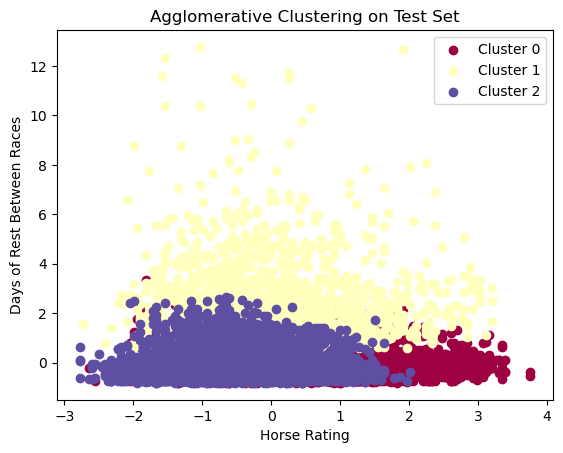

In [16]:
model = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(test_set)
predicted_clusters = model.fit_predict(test_set)
unique_labels = set(predicted_clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    cluster_points = test_set[predicted_clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 4], c=[color], label=f'Cluster {label}')

plt.title('Agglomerative Clustering on Test Set')
plt.xlabel('Horse Rating')
plt.ylabel('Days of Rest Between Races')
plt.legend()
plt.show()

Agglomerative clustering provides us with a similar looking plot to our k-means clustering plot, but with slightly more overlap between the 3 clusters. This phenomena makes sense as our silhouette score for agglomerative clustering is slightly lower for all parameter choices compared to k-means clustering. Still though, it is reassuring to see that once again, 3 clusters are being chosen as the most significant number of clusters among all choices for clusters.

# Final Results and Conclusions
Our final results point toward k-means clustering being the most effective method for clustering. DBSCAN does give us a fairly high silhouette score, but this is mostly due to the fact that it is only creating 1 real cluster with some noise, which is not really helpful for us to derive conclusions and some sort of grouping within our data. For this reason, we then look at our k-means clustering and hierarchichal clustering as better methods of clustering. Both give us 3 main clusters, but k-means clustering overall has a higher silhouette score with less overlap between clusters. 

The real question now becomes: what do the 3 clusters represent, especially since they do not really coincide with our target variables, the binary podium finish target variable and the variable of final finishing place which is the discrete integers 1 through 14? There are few explanations for what these clusters represent, given what we know abour data and what some of our visualizations in this section tell us. The most obvious answer is that it is clustering the data into the horses that perform well, horses that perform somewhere toward the middle of the road, and horses that perform poorly. We can especially see this explanation at play when we look at the interaction between features horse rating (the most comprehensive metric on horse performance) and days of rest between races. These variables explain most of the variance in our feature set (as explored in the PCA section) and show us that there is a cluster for horses who had a lot of days of rest and then horses who had few days of rest but are split up by if they have either a higher or lower rating. It is clear that horses who have a lot of days of rest are able to perform better. If they do not have a lot of days of rest, then their performance comes down to their rating; if they have a poor rating, they do fairly bad and if they have a higher rating, they perform either middle of the pack or better. 

I will add slightly more explanation later, along with a breakdown of our categorical variables.